------------------------------------------------------------------------------------------------------------
Number of Ticks = 1000
Number of simulations:  100

Pi median Ratio:  0.9081675420222931
Wa median Ratio:  0.7826856346520872
Het median Ratio:  0.9083691267500582

Expected Teta = 4*Ne*mu =  0.0015
Median Pi Autosome:  0.00072999
Median Wa Autosome:  0.001223995
Median Het Autosome:  0.000729504


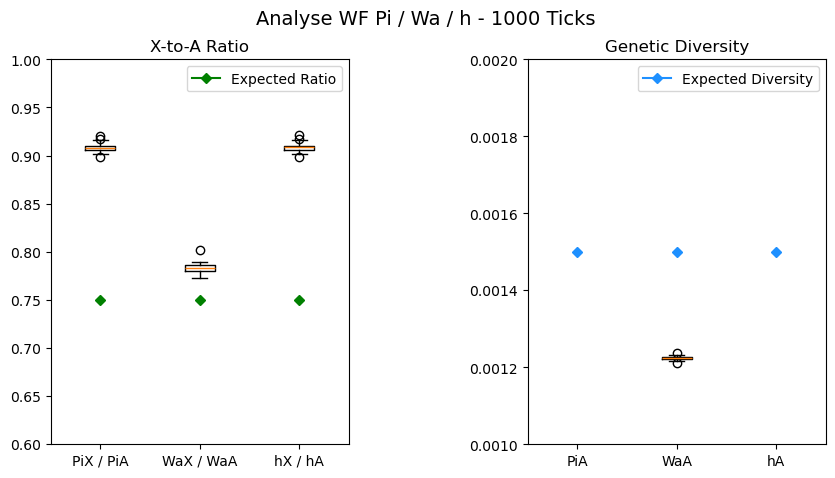

------------------------------------------------------------------------------------------------------------
Number of Ticks = 5000
Number of simulations:  100

Pi median Ratio:  0.7686620060394889
Wa median Ratio:  0.757842249170279
Het median Ratio:  0.7688364179763789

Expected Teta = 4*Ne*mu =  0.0015
Median Pi Autosome:  0.0014482050000000002
Median Wa Autosome:  0.00149964
Median Het Autosome:  0.001447245


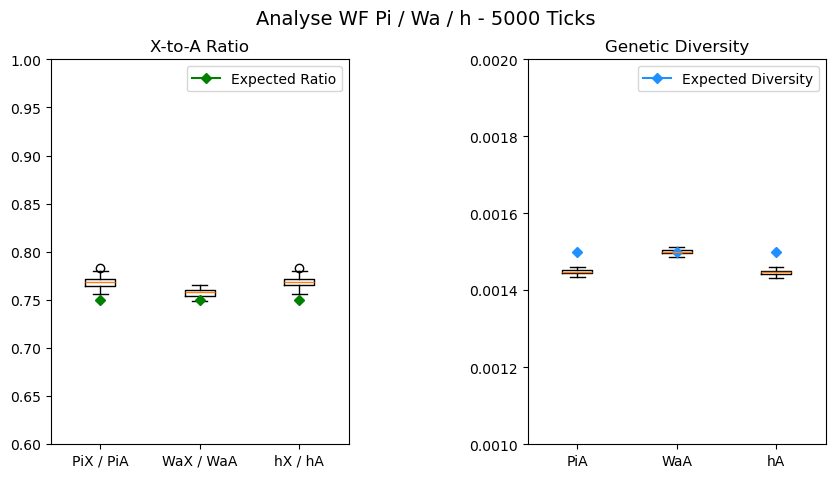

------------------------------------------------------------------------------------------------------------
Number of Ticks = 10000
Number of simulations:  100

Pi median Ratio:  0.7515530135092112
Wa median Ratio:  0.7509414934521919
Het median Ratio:  0.7517161211901959

Expected Teta = 4*Ne*mu =  0.0015
Median Pi Autosome:  0.00149913
Median Wa Autosome:  0.001518985
Median Het Autosome:  0.00149813


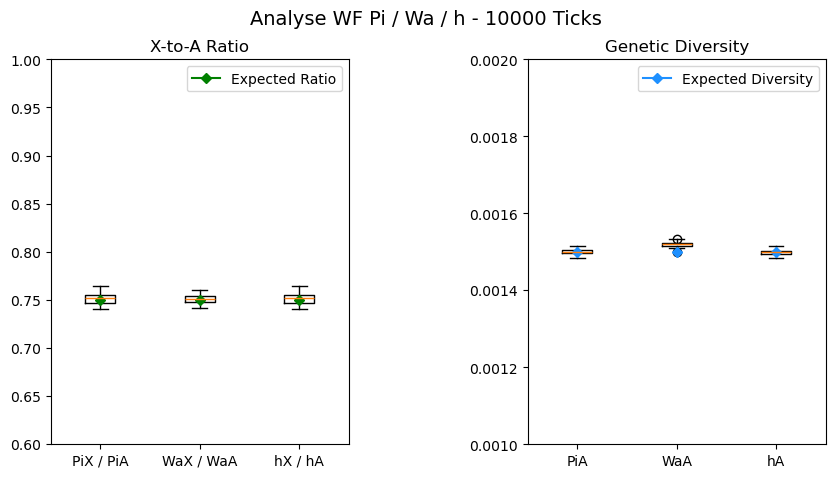

------------------------------------------------------------------------------------------------------------
Number of Ticks = 20000
Number of simulations:  19

Pi median Ratio:  0.7496937742983437
Wa median Ratio:  0.7502598308139612
Het median Ratio:  0.7498669469650603

Expected Teta = 4*Ne*mu =  0.0015
Median Pi Autosome:  0.0015019
Median Wa Autosome:  0.00152022
Median Het Autosome:  0.0015009


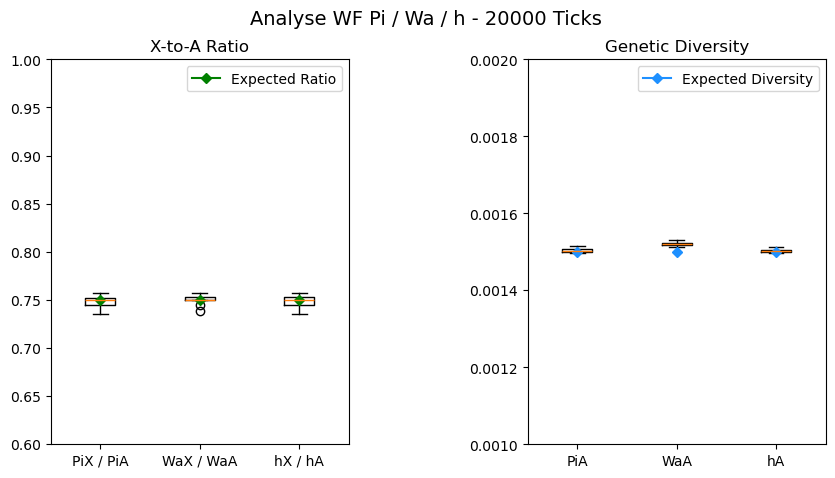

------------------------------------------------------------------------------------------------------------
Number of Ticks = 50000
Number of simulations:  0

Pi median Ratio:  nan
Wa median Ratio:  nan
Het median Ratio:  nan

Expected Teta = 4*Ne*mu =  0.0015
Median Pi Autosome:  nan
Median Wa Autosome:  nan
Median Het Autosome:  nan


/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


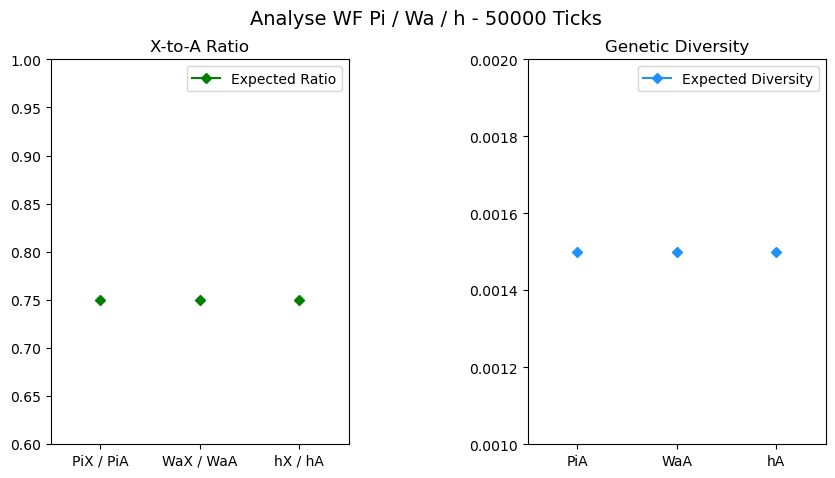

In [5]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/WF_Vanilla/WF_Het_Pi_Wa/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/WF_Vanilla/WF_Het_Pi_Wa/"
Lticks=[1000,5000,10000,20000,50000]
expected_ratio = 0.75
expected_teta = round (4*750*40*1.25e-8,10)

for NTICKS in Lticks:
    Pi_ratio = []
    Wa_ratio = []
    Het_ratio = []
    PiA = []
    WaA = []
    HetA = []
    for NUM in range(1,101):
        File = FOLDER+"WF_HetPiWa_Ticks"+str(NTICKS)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            Pi_ratio.append(float(Values[1])/float(Values[0]))
            Wa_ratio.append(float(Values[4])/float(Values[3]))
            Het_ratio.append(float(Values[7])/float(Values[6]))
            PiA.append(float(Values[6]))
            WaA.append(float(Values[3]))
            HetA.append(float(Values[0]))
            Text.close()
            
    Pi_median = np.median(Pi_ratio)
    Wa_median = np.median(Wa_ratio)
    Het_median = np.median(Het_ratio)
    PiA_mean = np.median(PiA)
    WaA_mean = np.median(WaA)
    HetA_mean = np.median(HetA)
    print("------------------------------------------------------------------------------------------------------------")
    print("Number of Ticks = "+str(NTICKS))
    print("Number of simulations: ",len(Pi_ratio))
    print()
    print("Pi median Ratio: ",Pi_median)
    print("Wa median Ratio: ",Wa_median)
    print("Het median Ratio: ",Het_median)
    print()
    print("Expected Teta = 4*Ne*mu = ", expected_teta )
    print("Median Pi Autosome: ",PiA_mean)
    print("Median Wa Autosome: ",WaA_mean)
    print("Median Het Autosome: ",HetA_mean)
    
    fig, ax = mp.subplots(1,2,figsize=(10, 5))
    fig.subplots_adjust(wspace=0.6)
    fig.suptitle(f"Analyse WF Pi / Wa / h - {NTICKS} Ticks", fontsize=14)
    
    ax[0].boxplot([Pi_ratio,Wa_ratio,Het_ratio],tick_labels=["PiX / PiA","WaX / WaA","hX / hA"])
    ax[0].set_title("X-to-A Ratio")
    ax[0].set_ylim([0.6, 1])
    ax[0].plot(1, expected_ratio, marker='D', color='green', markersize=5, label='Expected Ratio')
    ax[0].plot(2, expected_ratio, marker='D', color='green', markersize=5)
    ax[0].plot(3, expected_ratio, marker='D', color='green', markersize=5)
    ax[0].legend()
    
    ax[1].boxplot([PiA,WaA,HetA],tick_labels=["PiA","WaA","hA"])
    ax[1].set_title("Genetic Diversity")
    ax[1].set_ylim([1e-3, 2e-3])
    ax[1].plot(1, expected_teta, marker='D', color='dodgerblue', markersize=5, label='Expected Diversity')
    ax[1].plot(2, expected_teta, marker='D', color='dodgerblue', markersize=5)
    ax[1].plot(3, expected_teta, marker='D', color='dodgerblue', markersize=5)
    ax[1].legend()

    fig.savefig(FOLDER_output+'WF_PiWa_Ticks'+str(NTICKS)+'.png') 

    
    mp.show()



**Analyse Number of Ticks:**
- After 5000 Ticks, the differences on variations and values of the *X-to-A ratio* and the *Genetic diversity* are very low between the Ticks.
- We can assume the burning periode finished at 10000 Ticks.

**Analyse *Genetic Diversity* estimators:**
- The Watterson's teta has always less variance than Pi, for every number of ticks and both *X-to-A ratio* and *Genetic Diversity* estimation.
- The Watterson's teta seems slightly better to estimate the *X-to-A ratio* than Pi.
- However, Pi is much better to estimate the *Genetic Diversity* than Watterson's teta.